DSCI100 Group Project: Individual Project Planning Report

1. Data description

In [1]:
library(repr)
library(tidyverse)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


>Firstly, the sessions data would be examined.

In [2]:
sessions <- read_csv("Data/sessions.csv")
head(sessions, 5)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


>As we can see above, the sessions data consists of 1535 observations with "4 variables": 

|Variables|What they are|
|---|---|
|hashedEmail|the encrypted email names of the users, cannot be used as categorical and numerical operations because it is a string|
|start_time|the time users begins the session, cannot be used as categorical and numerical operations because it is a string|
|end_time|the time users ends the session, cannot be used as categorical and numerical operations because it is a string|
|original_start_time|the start time that can be used in calculations because it is considered numerical in the dataframe|
|original_end_time|the end time that can be used in calculations because it is considered numerical in the dataframe| 

>However, one thing of note is that the data can be considered unclean as there is 2 variables merged in both start_time and end_time, as the date and time is merged into one space. Further data wrangling wopuld be needed to separate the 2 variables into 2 cells if we were to do analysis using these variables, just like the geyser dataframe example in previous worksheets. These data can be useful for studying the fluctuation of player count over the years.

>Moreover, the hashedEmail might prove to be problematic as it is extremely messy to look at. We might have to cross-merge with the players.csv data to replace the hashed email with the users names are a cleaner presentation.

>We might also have to mutate the dataframe to calculate the session time length for each session, as the original_start_time and original_end_time is extremely unpleasing to look at. The advantage of this is that we can further use group_by(), summarise() or map_df() to calculate the mean time session of players at different skill level, which would be more conventient.

>Another potential issue is that as the observations are based on individual sessions logged into the database, there would be repeats where the hashedEmail would be the same across multiple observations. We might have to wrangle the data using group_by() and summarise() to find the mean time session of a player if we were to do summary statistics of the data.

>Then, the players data would be examined.

In [3]:
players <- read_csv("Data/players.csv")
head(players,5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


>As we can see, the players data consists of 196 observations with 7 variables:

|Variables|What they are|
|---|---|
|experience|How good the user is at the game, cannot be used as categorical and numerical operations because it is a string|
|subscribe|Whether the user is a subscriber of the program|
|hashedEmail|the encrypted email names of the users, cannot be used as categorical and numerical operations because it is a string|
|played_hours|Number of hours spent by the user on the game|
|name|the name of the user, cannot be used as a categorical variable because it is a string| 
|gender|the gender of the user, cannot be used as a categorical variable because it is a string|
|Age|Age of the user|

>The data is clean as each cell corresponds to one variable, and each row is only about one observation.

>An observation in this dataframe is a player of MineCraft.

>One potential issue is that some data wrangling would have to be done on columns such as experience and gender to turn them into factors using as_factor(), so that we can treat them as categorical values for further analysis.

 2. Questions

I would like to address Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  

In particular, whether we are able to predict the number of hours played or level of experience just from age, and whether gender would affect the correlation between age, played hours and experience on sandbox games like minecraft. We would like to predict the number of hours played as the longer a players stays engaged with the game, the more data is generated for analysis. We would like to predict the level of experience as well because the level of experience might correlate the "quality" of data collected from users, as a more "pro" player is more likely to have a deeper understanding of game mechanics and such feedback might be more or less valuable than players with lower skill level.

3. Exploratory Data Analysis and Visualization

Just in case i have accidentally changed the dataframe data. The sessions and players data will be loaded into R again.

In [4]:
sessions <- read_csv("Data/sessions.csv")
players <- read_csv("Data/players.csv")
head(sessions, 3)
head(players, 3)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17


As discussed before, the sessions data contains untidy data. Therefore, the start_time and end_time will be further separated into start_date, start_time, end_date and end_time. 

Moreover, the data frame will be cross-referenced with the players data to assign the name of the user for each individual sessions for better readability.

In [5]:
sessions_wr <- sessions |>
    separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
    separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
    mutate(individual_session_length = original_end_time - original_start_time) |>
    left_join(players, by = "hashedEmail") |>
    select(name, hashedEmail, start_date, start_time, end_date, end_time, original_start_time, original_end_time, individual_session_length)
sessions_wr

name,hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time,individual_session_length
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Hiroshi,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12,0
Alex,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12,0
Delara,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12,0
Hiroshi,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12,0
Alex,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Alex,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024,23:01,10/05/2024,23:07,1.71538e+12,1.71538e+12,0
Lane,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024,04:08,01/07/2024,04:19,1.71981e+12,1.71981e+12,0
Dana,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15:36,28/07/2024,15:57,1.72218e+12,1.72218e+12,0


As the players data are alreay very tidy, only the mean value for each quantitative variable in the players.csv data set will be computed.

In [7]:
players <- read_csv("Data/players.csv")
players
players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm=TRUE)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


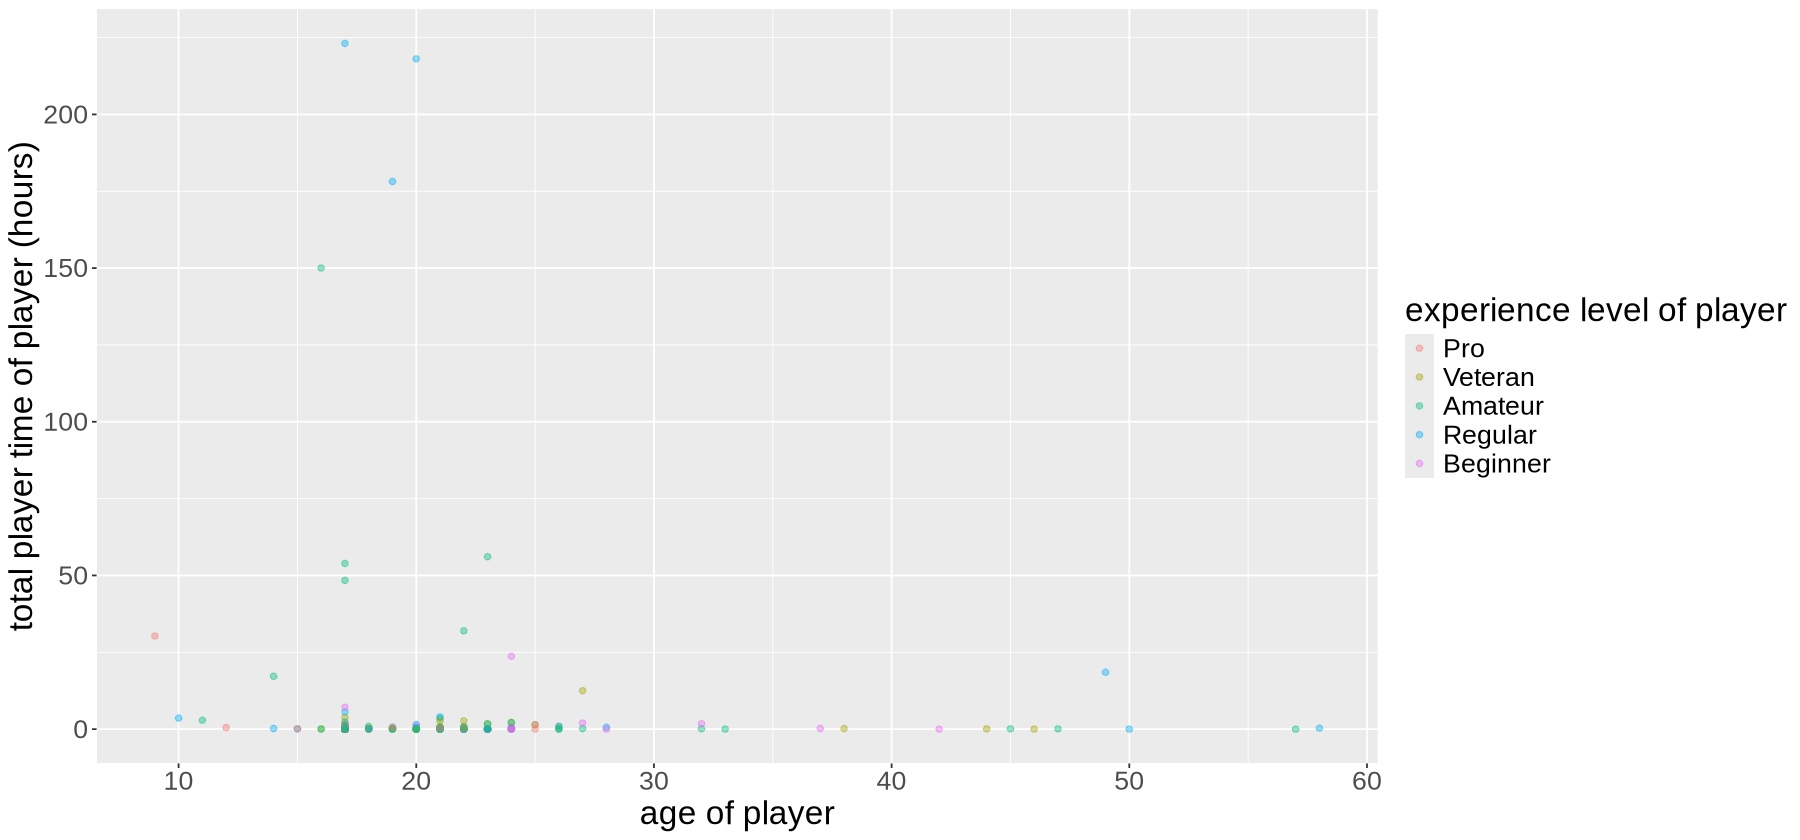

In [30]:
options(repr.plot.height=7,repr.plot.width=15)
players_exp_plot <- players |>
    mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
    ggplot(aes(x=Age, y=played_hours, color=experience)) +
    geom_point(alpha= 0.4) +
    labs(x="age of player", y= "total play time of player (hours)", color= "experience level of player", title = "Total Play time of player of Different experience level against age +
    theme(text = element_text(size=20))
players_exp_plot

Link to my Github repository: https://github.com/terri2003/DSCI100GroupProjectIndividualPlanning